<a href="https://colab.research.google.com/github/amanjaiswal777/Tasks/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
!pip install yfinance

     |████████████████████████████████| 62 kB 608 kB/s 
     |████████████████████████████████| 6.4 MB 8.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf
%matplotlib inline

In [4]:
start = "2016-12-24"
end = '2021-12-30'
tesla = yf.download('TSLA',start,end)
google = yf.download('GOOGL',start,end)
microsoft = yf.download('MSFT',start,end)
bitcoin = yf.download('BTC-USD', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3226249984
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5208249856
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4908680192
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8957349888
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6263249920


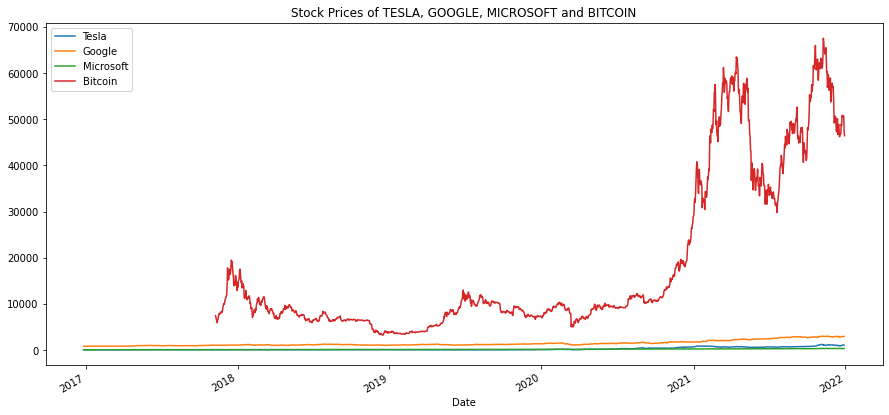

In [6]:
tesla['Open'].plot(label = 'Tesla', figsize = (15,7))
google['Open'].plot(label = "Google")
microsoft['Open'].plot(label = 'Microsoft')
bitcoin['Open'].plot(label = 'Bitcoin')
plt.title('Stock Prices of TESLA, GOOGLE, MICROSOFT and BITCOIN')
plt.legend()

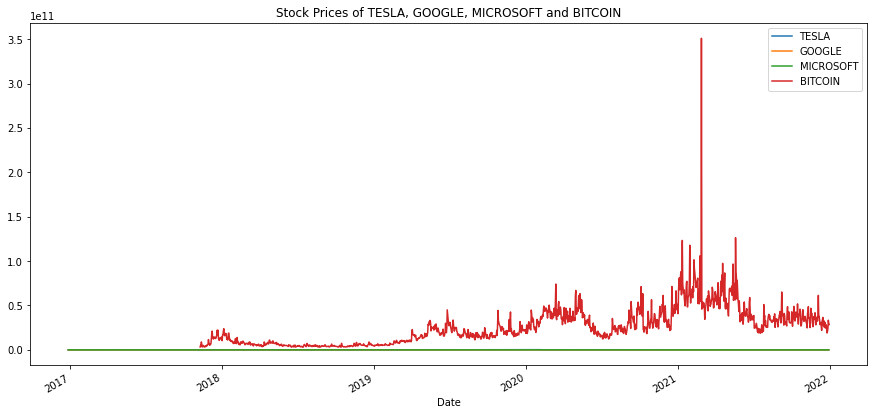

In [7]:
tesla['Volume'].plot(label = 'TESLA', figsize = (15,7))
google['Volume'].plot(label = "GOOGLE")
microsoft['Volume'].plot(label = 'MICROSOFT')
bitcoin['Volume'].plot(label = 'BITCOIN')
plt.title('Stock Prices of TESLA, GOOGLE, MICROSOFT and BITCOIN')
plt.legend()

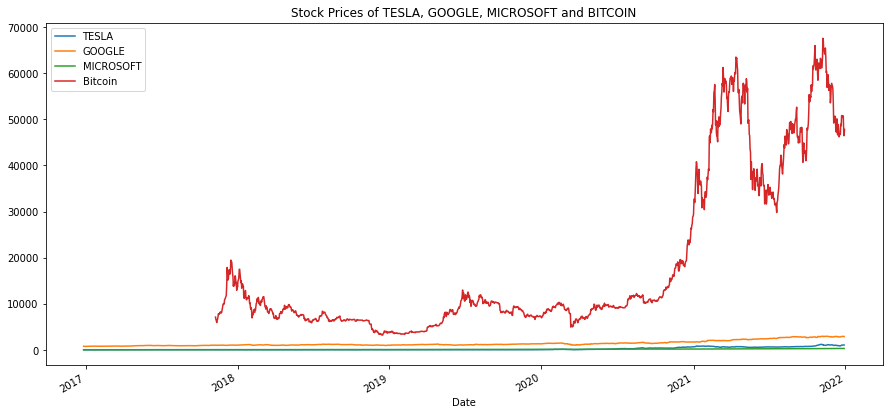

In [8]:
tesla['Adj Close'].plot(label = 'TESLA', figsize = (15,7))
google['Adj Close'].plot(label = "GOOGLE")
microsoft['Adj Close'].plot(label = 'MICROSOFT')
bitcoin['Adj Close'].plot(label = 'Bitcoin')
plt.title('Stock Prices of TESLA, GOOGLE, MICROSOFT and BITCOIN')
plt.legend()

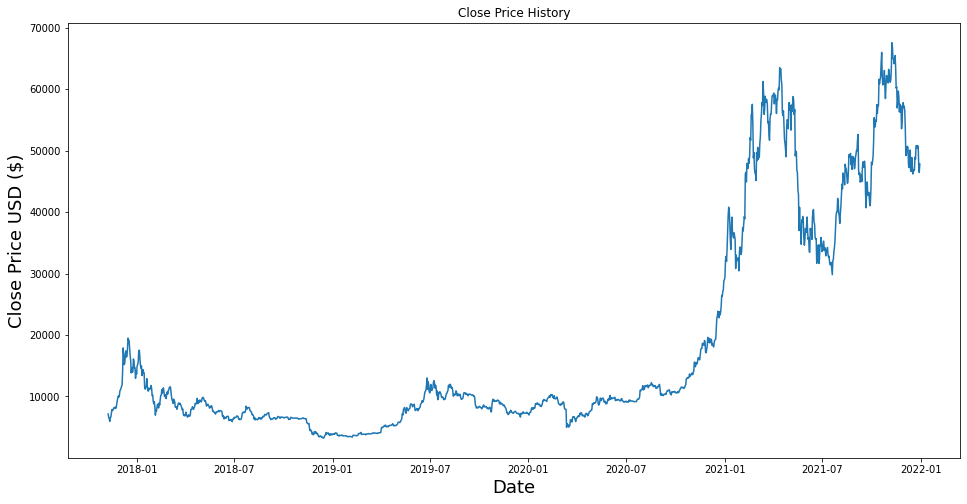

In [9]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(bitcoin['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column 
data = bitcoin.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# print(dataset[0])
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1438

In [11]:
len(data)

1513

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.06073083],
       [0.05256296],
       [0.0485129 ],
       ...,
       [0.68944579],
       [0.67166026],
       [0.69294921]])

In [13]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
# print(x_train[0])

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06073083, 0.05256296, 0.0485129 , 0.04217792, 0.05165125,
       0.0528367 , 0.06340392, 0.07204918, 0.06952004, 0.07078165,
       0.07461097, 0.07716264, 0.07515145, 0.07798512, 0.07464641,
       0.07798731, 0.08633845, 0.0947269 , 0.10230967, 0.10604743,
       0.10340186, 0.10876466, 0.12029893, 0.12183786, 0.12570232,
       0.13089429, 0.13492818, 0.17184404, 0.22793288, 0.20725361,
       0.18562764, 0.18993667, 0.21296479, 0.22040454, 0.20474777,
       0.20716966, 0.22493586, 0.25276888, 0.2472256 , 0.24681208,
       0.22602087, 0.20811168, 0.1953385 , 0.16469807, 0.17818167,
       0.16615929, 0.1677262 , 0.19995375, 0.19589189, 0.17674066,
       0.17751324, 0.15102485, 0.16974394, 0.16198395, 0.18257929,
       0.18598206, 0.19217201, 0.22062372, 0.22213934, 0.20582659])]
[0.18550171882716437]

[array([0.06073083, 0.05256296, 0.0485129 , 0.04217792, 0.05165125,
       0.0528367 , 0.06340392, 0.07204918, 0.06952004, 0.07078165,
       0.07461097, 0.07716264, 0.07

In [14]:
x_train[0].shape

(60, 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
1378/1378 [==============================] - 35s 21ms/step - loss: 0.0024
Epoch 2/5
1378/1378 [==============================] - 27s 20ms/step - loss: 0.0011
Epoch 3/5
1378/1378 [==============================] - 27s 20ms/step - loss: 6.8005e-04
Epoch 4/5
1378/1378 [==============================] - 28s 20ms/step - loss: 8.0719e-04
Epoch 5/5
1378/1378 [==============================] - 28s 20ms/step - loss: 5.2960e-04


In [16]:
# Create the testing data set
# Create a new array containing scaled values from index 1438 to 1513
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 )) 

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2552.533507884408

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


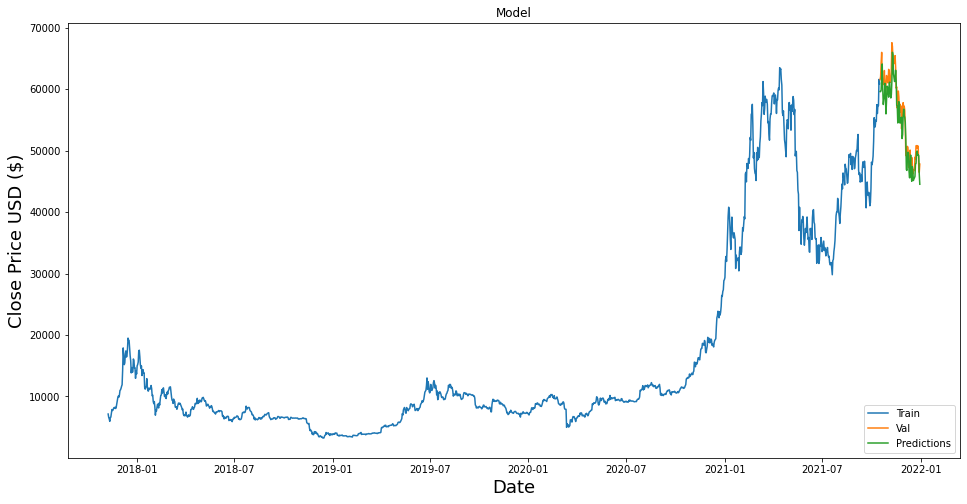

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-10-17,61553.617188,59616.320312
2021-10-18,62026.078125,59595.105469
2021-10-19,64261.992188,59841.542969
2021-10-20,65992.835938,62095.074219
2021-10-21,62210.171875,64103.000000
...,...,...
2021-12-26,50809.515625,49235.894531
2021-12-27,50640.417969,49313.722656
2021-12-28,47588.855469,49183.839844
